In [45]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis
# !ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ML2023/data-analysis
/content/drive/MyDrive/ML2023/data-analysis


# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

# Import the helper classes

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [47]:
# import warnings
# from sklearn.exceptions import FitFailedWarning
# # Filter out the FitFailedWarning
# warnings.filterwarnings("ignore", category=FitFailedWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

In [48]:

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information




The data is provided by: https://www.kaggle.com/datasets/saramah/loan-data




Lending Club facilitates connections between individuals seeking funds (borrowers) and those with capital to invest (investors). Ideally, as an investor, you would seek to invest in individuals who exhibit a profile indicating a high likelihood of repayment. In this analysis, we will utilize lending data spanning from 2007 to 2010 to classify and predict whether borrowers have fully repaid their loans or not.






| Column Name        | Description                                                                                           |
|--------------------|-------------------------------------------------------------------------------------------------------|
| credit.policy      | 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.         |
| purpose            | The purpose of the loan (values: "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other"). |
| int.rate           | The interest rate of the loan, as a proportion (e.g., 11% stored as 0.11).                            |
| installment        | The monthly installments owed by the borrower if the loan is funded.                                   |
| log.annual.inc     | The natural log of the self-reported annual income of the borrower.                                    |
| dti                | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                    |
| fico               | The FICO credit score of the borrower.                                                                |
| days.with.cr.line  | The number of days the borrower has had a credit line.                                                |
| revol.bal          | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).          |
| revol.util         | The borrower's revolving line utilization rate (credit line used relative to total credit available).  |
| inq.last.6mths     | The borrower's number of inquiries by creditors in the last 6 months.                                  |
| delinq.2yrs        | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.          |
| pub.rec            | The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).     |



# Import Dataset

In [49]:
df = aka_clean.df_get('Loan_data/loan_data.csv')

# Clean Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [51]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

## Swap the target and the last feature

In [52]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

## Drop feature(s)


In [53]:
feat = []
df = aka_clean.drop_feature(df,feat)
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [54]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

##  Convert categorical variables into numerical representations

In [55]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        0    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        0    0.1357       366.86       10.373491  11.63   682   
3              1        0    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

## Balance Dataset

<Axes: ylabel='count'>

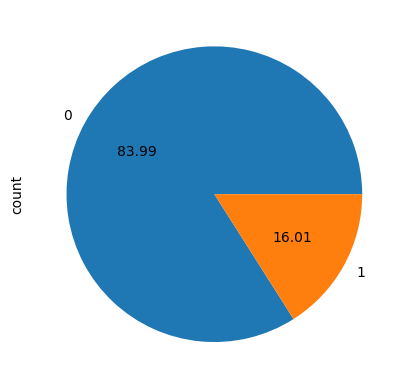

In [56]:
df[df.columns[-1]].value_counts().plot.pie(autopct='%.2f')

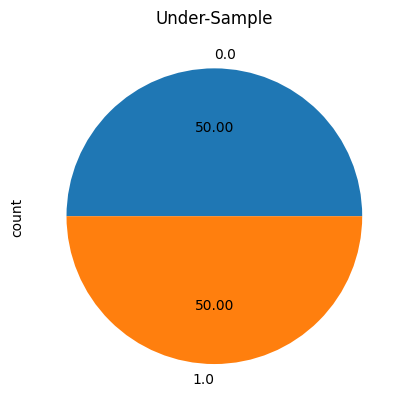

In [57]:
df = aka_clean.balance_df(df)

## Clean Dataset

In [58]:

confidence_interval_limit =   5             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .8      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

diff_shape = (df.shape[0]-df_filtered.shape[0],df.shape[1]-df_filtered.shape[1])
diff_shape,df_filtered.shape

((6595, 0), (2983, 14))

## Graph the features that are highly correlated


In [59]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp),400,500,3)
if fig is not None:
    fig.show()

Empty list is provided.


## Visualize the distribution of the filtered dataset

In [60]:
aka_plot.Plot_box_Features(df,df_filtered,400,500,3,range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

## Choose the parameters for the searching

<center>


<font size="45">

**Table of the list of machine learning algorithms to use in the search**

|Keys | ML name |
------ |----------------------
|LGC| Logistic Regression |    
|DTC| Decision Tree Classifier|
|KNN| K-Nearest Neighbors |
|SVC| Support Vector Classification |
|GNB| Gaussian Naive Bayes |
|SGD| Stochastic Gradient Descent |
|ABC| AdaBoost classifier|
|RFC| Random Forest Classifier|
|GBC| Gradient Boosting Classifier|

</font>

</center>

In [61]:

mls = ['DTC','RFC', 'KNN', 'ABC','LGC']    # Choose the key of the Machine learning algorithm'GNB',


pre_proc = 'NM'                             # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',
                                              #                'none' to not standardize the dataset
disp_dash = 'all'                             # Choose between  'all' to diplay all report of the ML
                                              #                 'sup'  to display the most significant report

mach = 'adv'                                  # Choose between  'adv' to use advanced parameters in the ML model
                                              #                  'none' to use a default parameters

file_name = 'data'                            # Enter the name of the output data file for the report

file_name_scre = 0.85                        # Enter the minimum value of the ML score to be saved in the report

In [62]:
aka_learn.Search_ML_2(df_filtered ,mls,mach,pre_proc,confidence_interval_limit,correlation_percentage_threshold,diff_shape,disp_dash,file_name,file_name_scre)

conf_inter  corr_per  size_removed  ML   score      MSE    simul_time(min)
___________________________________________________________________________
  5      0.8     (6595, 0)     DTC     58.212     0.418      0.11 
  5      0.8     (6595, 0)     RFC     58.883     0.411      0.47 
  5      0.8     (6595, 0)     KNN     52.849     0.472      0.09 
  5      0.8     (6595, 0)     ABC     59.441     0.406      1.00 
  5      0.8     (6595, 0)     LGC     58.436     0.416      0.02 


In [63]:
ml = 'RFC'
pre_proc = 'none'

clf,scre,MSE_,y_test,y_pred = aka_learn.ML_pred(df_filtered,pre_proc,ml)



## Confusion Matrix

In [64]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = [ str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [65]:
shw = 1
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label,shw)
fig2.show()

## Classification Report

In [66]:
shw = 1
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label,shw)
fig3.show()